## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')#reading the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape[0]#number of rows

294478

In [4]:
df.user_id.nunique()#number of nuique users

290584

In [5]:
df.query('converted == "1"').shape[0] / df.converted.count()#The proportion of users converted.

0.11965919355605512

In [ ]:
df.query('group == "treatment" & landing_page != "new_page"').shape[0]#The number of times the new_page and treatment don't match.

In [7]:
df[df.isna()].count()#checking if there is any missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
df = df.drop(df[(df.group == "treatment") & (df.landing_page != "new_page")].index)
df = df.drop(df[(df.group == "control") & (df.landing_page != "old_page")].index)
df2=df

In [9]:
#checking 
df2.query('group == "control" & landing_page != "old_page"').shape[0]
df2.query('group == "treatment" & landing_page != "new_page"').shape[0]


0

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df2.user_id.nunique()#number of unique users

290584

In [12]:
df2['user_id'].loc[df2['user_id'].duplicated()]#duplicated id

2893    773192
Name: user_id, dtype: int64

In [13]:
df2.shape[0]

290585

In [14]:
df2.loc[df2['user_id'].duplicated()]#some info about the duplicated user id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
df2 = df2.drop(df2.loc[df2['user_id'].duplicated()].index)#remove the duplicates
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
df2.shape[0]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
df2.query('converted == 1').shape[0] / df2.converted.count() #proportion of converted

0.11959708724499628

In [18]:
#proportion of converted and the group is control
df2.query('converted == 1 & group == "control"').shape[0] / df2.query('group == "control"')['converted'].count()

0.1203863045004612

In [19]:
#proportion of converted and the group is treatment
df2.query('converted == 1 & group == "treatment"').shape[0] / df2.query('group == "treatment"')['converted'].count()

0.11880806551510564

In [20]:
#prpoability of individual received the new page
df2.query('landing_page == "new_page"').shape[0]/df2.landing_page.count()

0.50006194422266881

**The probablity users converted in both control and treatment group are pretty similar to each other and  probability of an individual converting regardless of the page they receive. therefore, there is no evidence that ne page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0 :  $p_{old}$ >= $p_{old}$**

**H1 :  $p_{old}$ < $p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [42]:
#get the  conversion rate for  Pnew  under the null
P_new = df2.query('converted == 1 & group == "treatment"').shape[0] / df2.query('group == "treatment"')['converted'].count()
P_new

0.11880806551510564

In [22]:
#get the  conversion rate for  Pold  under the null
P_old = df2.query('converted == 1 & group == "control"').shape[0] / df2.query('group == "control"')['converted'].count()
P_old

0.1203863045004612

In [23]:
#the number of individuals in the treatment group
N_new = df2.query('group == "treatment"').shape[0]
N_new

145310

In [24]:
#the number of individuals in the control group
N_old = df2.query('group == "control"').shape[0]
N_old

145274

In [25]:
# Simulate  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null. Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.
new_page_converted = np.random.choice([0,1], N_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
#Simulate  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null. Store these  𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.
old_page_converted = np.random.choice([0,1], N_old)
old_page_converted

array([1, 1, 0, ..., 1, 1, 1])

In [27]:
#finding the differences in mean
ctr_diff = new_page_converted.mean() - old_page_converted.mean()
ctr_diff

0.00018580964833803115

In [28]:
#Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called p_diffs.
p_diffs = []
for i in range(10000):
    b_sample = df2.sample(df2.shape[0], replace = True)
    treatment_ctr = b_sample.query('group == "treatment"').shape[0] / b_sample.group.count()
    control_ctr = b_sample.query('group == "control"').shape[0] / b_sample.group.count()
    p_diffs.append(treatment_ctr - control_ctr)

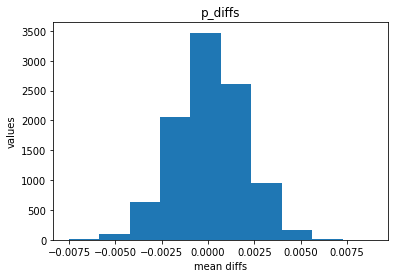

In [44]:
#visualize p_diffs
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('mean diffs')
plt.ylabel('values')
plt.title('p_diffs')
plt.show()

0.8054

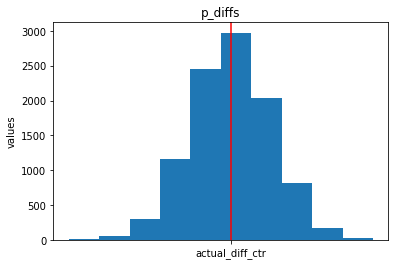

In [49]:
#proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
treatment = df2.query('converted == 1 & group == "treatment"').shape[0] / df2.query('group == "treatment"')['converted'].count()
control = df2.query('converted == 1 & group == "control"').shape[0] / df2.query('group == "control"')['converted'].count()
actual_diff_ctr = treatment - control
null = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null)
plt.axvline(x='actual_diff_ctr', color = 'red')
plt.ylabel('values')
plt.title('p_diffs')
(null > actual_diff_ctr).mean()

**p value : The probability of observing our statistic or a more extreme statistic from the null hypothesis.**

In [31]:
import statsmodels.api as sm

convert_old = treatment
convert_new = control
n_old = N_old
n_new = N_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [32]:
#stats.proportions_ztest to compute your test statistic and p-value.
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [51]:
from scipy.stats import norm
#what significant our z-score is?
norm.cdf(z_score),norm.ppf(1-(0.05/2))#what our critical value at 95% confidence is



(0.50126320798303359, 1.959963984540054)

The z-score 0.50126320798303359 does not exceed the critical value 1.959963984540054 ,So we fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users. This result is the same as parts J. and K. result.

**we will use : Logistic regression.**

In [34]:
df2['intercept'] = 1#creating the intercept phase

In [53]:
df2[['control','treatment']] = pd.get_dummies(df2['group'])#creating the dummy values of the categorical variable
df2= df2.join(pd.get_dummies(df2['landing_page']))
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()
lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])#fitting the model

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
lo.fit().summary2()#summary results

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-31 17:32 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**the p-value associated with ab_page = 0.1899.
The null in part II is  that there is no difference between the treatment and control group.,
Alternative hypotheses is that there is difference between between the treatment and control group**

**Advantages : Timestamp variable,
For timestamp	variable, we can convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".
Disadavantage for adding additional terms into regression model is that it will make interpretate the model more complex and also, if new terms are dependable variable with the exisiting explanatory term, we need to add higher order term to help predict the result better.
.**

In [55]:
c = pd.read_csv('countries.csv')
c.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [56]:
df3 = df2.merge(c, on ='user_id', how='left')#merging with c data frame
df3.head()


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1,US


In [57]:
c['country'].unique()#get the unique values 

array(['UK', 'US', 'CA'], dtype=object)

In [58]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])

In [59]:
df3['intercept'] = 1#creating the intercept
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result = logit3.fit()#fitting the model


Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
result.summary2()#summary of the result

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-31 17:33 AIC:              212780.6124
No. Observations:   290582           BIC:              212822.9310
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2485  0.0000  -2.0822  -1.9778
new_page      -0.0150    0.0114   -1.3083  0.1908  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5165  0.1294  -0.0119   0.0935
==================================================================

"""

In [62]:
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary2()
#exponentiated the CV to inteprete the result
np.exp(result4.params)


Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.047978
UK             1.011854
US             1.017705
dtype: float64

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
x = df3[['new_page','UK_new_page','US_new_page','UK','US']]
y = df3['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


lm = LogisticRegression()



lm.fit(X_train,y_train) # fit the train data

print(lm.score(X_test,y_test))

# The score reuslt is very low, which mean the page and country dataset are not a good fit to predit converted rate .


0.881964279569


# Conclusion
## We fail to reject the null condition, that the old page is better than the new one

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0